## Setps in Data analysis
1. Importing necessary libraries
2. Reading the dataset
3. Data Understanding (null values, checking for duplicates, data types, etc)
4. Data Reduction
5. Feature Engineering
6. Creating Features
7. Data Wrangling
8. **Exploratory Data Analysis (EDA)**
    - Univariate
    - Bivariate
    - Multivariate

Parts of EDA
1. Univariant - When we are trying to understand individual variables / columns / features through their distribution and  summary statistics it forms univariance analysis, this include calculating measures such as mean, median ,mode, std dev, var and data viz like histogram , bar charts
2. bivariant - it exploers the realationship between two variables, it identifies or uncovers patterns through techniques like  scatter plot, heatmap . correlation , covariance.
3. Mulvariant - it involes examining more than two varibales simultaneously to understand their relationship and combine effects , complt plot, PAC(principal componant analysis) ,adding  a hue to scatter plot converts bivariant analyis to multivariant analysis

In [15]:
#step1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 

In [16]:
warnings.filterwarnings('ignore')

In [17]:
#step 2: importing the dataset to dataframe
data =pd.read_csv('used_cars_data.csv')
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [18]:
#step3 data analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [19]:
#check for duplicates 
data.duplicated().sum()

0

In [20]:
#check for duplicates
data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [21]:
#check null values and treating them
data.isnull().sum()/len(data) * 100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

## data Reduction

In the used car dataset we don't require the 'S.No.' Column and the 'New_Price' column consists of 86% null values so we drop these 2 columns.
And to handel remaining null values we detele the rows

In [24]:
#droping the unnecessary column from the model
data.drop(columns=['S.No.','New_Price'], inplace=True)

#droping the rows from the columns that are apart of the model
data.dropna(subset= ['Mileage', 'Engine' ,'Power', 'Seats', 'Price'],inplace=True)


In [25]:
#reseet index after droping rows
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 560.3+ KB


## Feature Engineering

the name column consist of brand and model so we need to seperate them to make furthur analysis easy 

In [28]:
data['Brand'] = data.Name.str.split().str.get(0)
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)

In [29]:
data[['Name', 'Brand', 'Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
5970,Maruti Swift VDI,Maruti,SwiftVDI
5971,Hyundai Xcent 1.1 CRDi S,Hyundai,Xcent1.1
5972,Mahindra Xylo D4 BSIV,Mahindra,XyloD4
5973,Maruti Wagon R VXI,Maruti,WagonR


For the analysis of used cars we should require the age of the car, also the price may variy accordingly 

In [31]:
from datetime import date
data['Car_Age']= date.today().year - data.Year
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,WagonR,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta1.6,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,JazzV,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,ErtigaVDI,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4New,12


Power and the Engine columns are of type text, to find correlation we need to converts these to float  

In [33]:
#cleaning the power, engine column 
data['Power'] = data.Power.str.split().str.get(0)
data['Engine'] =data.Engine.str.split().str.get(0)

data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998,58.16,5.0,1.75,Maruti,WagonR,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582,126.2,5.0,12.50,Hyundai,Creta1.6,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199,88.7,5.0,4.50,Honda,JazzV,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76,7.0,6.00,Maruti,ErtigaVDI,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.8,5.0,17.74,Audi,A4New,12


In [34]:
#converting string to float of power column
data['Power'] = pd.to_numeric(data['Power'], errors='coerce')
data['Engine']=pd.to_numeric(data['Engine'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   int64  
 9   Power              5872 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
 12  Brand              5975 non-null   object 
 13  Model              5975 non-null   object 
 14  Car_Age            5975 non-null   int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 700.3+ KB


In [35]:
data['Seats']=data['Seats'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   int64  
 9   Power              5872 non-null   float64
 10  Seats              5975 non-null   object 
 11  Price              5975 non-null   float64
 12  Brand              5975 non-null   object 
 13  Model              5975 non-null   object 
 14  Car_Age            5975 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 700.3+ KB


mileage column is in text format, for the analysis we want this column as float and this column consist of two types of units (km/kg and kmpl), to convert it into a single unit i.e. in kmpl we need to define a function which will convert km/kg to kmpl 

In [37]:
#function to convert km/kg to kmpl
def convert_to_kmpl(mileage):
    if 'km/kg' in mileage: 
        return float(mileage.replace('km/kg',''))*1.4 #extract numerical value and return kmpl value
    elif 'kmpl' in mileage:
        return float(mileage.replace('kmpl',''))   
    return np.nan
    

to apply above function to all cells of mileage 

In [39]:
data['Mileage'] = data['Mileage'].apply(lambda x: convert_to_kmpl(str(x)))
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998,58.16,5.0,1.75,Maruti,WagonR,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai,Creta1.6,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda,JazzV,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,ErtigaVDI,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi,A4New,12


## Data wrangling / Data cleaning

In [41]:
print(data.Brand.unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']


In [42]:
data['Brand'].replace({"ISUZU": "Isuzu", "Land": "Land Rover", "Mini": 'Mini Cooper'}, inplace = True)
print(data.Brand.unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land Rover' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra'
 'Ford' 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda'
 'Mini Cooper' 'Fiat' 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'Force'
 'Bentley' 'Lamborghini']


In [43]:
print(data.Location.unique())
print(data.Fuel_Type.unique())
print(data.Transmission.unique())
print(data.Owner_Type.unique())
print(data. Seats.unique())
print(data.Model.unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']
['5.0' '7.0' '8.0' '4.0' '6.0' '2.0' '10.0' '9.0' '0.0']
['WagonR' 'Creta1.6' 'JazzV' 'ErtigaVDI' 'A4New' 'EONLPG' 'MicraDiesel'
 'InnovaCrysta' 'VentoDiesel' 'IndicaVista' 'CiazZeta' 'City1.5'
 'SwiftVDI' 'RoverRange' 'RoverFreelander' 'PajeroSport' 'AmazeS'
 'SwiftDDiS' 'Duster85PS' 'NewC-Class' '3Series' 'SCross' 'A62011-2015'
 'i201.2' 'VentoPetrol' 'CityCorporate' 'AltoK10' 'WRVi-VTEC' 'Innova2.5'
 'Duster110PS' 'CorollaAltis' 'SsangyongRexton' 'A62.7' 'Vento1.6'
 'VitaraBrezza' 'KUV100' 'M-ClassML' 'PoloDiesel' 'AltoLXi' 'NanoLX'
 'i20Magna' 'Elantra2.0' 'ElantraCRDi' 'Xcent1.1' 'TharCRDe' 'A42.0'
 'SwiftLDI' 'SwiftLdi' 'Grandi10' 'Vento2013-2015' 'KWIDRXT' 'i10Asta'
 'X-TrailSLX' 'ZenEstilo' 'FigoDiesel' 'IndicaV2' 'CityZX'
 'C-ClassProgressive' 'ErtigaSHVS' 'Creta1.4' '

# EDA

In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5975.0,2013.386778,3.247238,1998.00,2012.00,2014.00,2016.00,2019.000
Kilometers_Driven,5975.0,58674.314979,91558.514361,171.00,33908.00,53000.00,73000.00,6500000.000
Mileage,5975.0,18.287676,4.823919,0.00,15.26,18.20,21.10,46.956
Engine,5975.0,1621.606695,601.036987,624.00,1198.00,1493.00,1984.00,5998.000
Power,5872.0,113.276894,53.881892,34.20,75.00,97.70,138.10,560.000
Price,5975.0,9.501647,11.205736,0.44,3.50,5.65,9.95,160.000
Car_Age,5975.0,11.613222,3.247238,6.00,9.00,11.00,13.00,27.000


**Analysis**
- Years range from 1998 to 2019. This implies a high range of 21 years with most of the cars falling between 2012 to 2019 (75%). This implies that data contains both old and latest model (mostly cars with less than 5 years of age).
- Average kilimeters drives is ~59 KM. The range is huge (64 lakh) implying presence of outliers in the columns. It means we need to remove the outliers from this column.
- The minimum value in Mileage column is 0, which can not be sold. This appears like a data entry issue.
- Both Engine and Power have outliers and data seem to be rightly skewed.
- The max price for the used car is 160K, which is quite high for the used car. This may be an outlier or a data entry issue.
- Avg age of car is ~12 years

In [47]:
cat_col = data.select_dtypes(include=["object"]).columns.tolist()
num_col = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical columns are: ", cat_col)
print("Numrical columns are: " , num_col)

Categorical columns are:  ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand', 'Model']
Numrical columns are:  ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'Car_Age']


## EDA Univariate Analysis (Data Viz)

Year
Skewness: -0.84


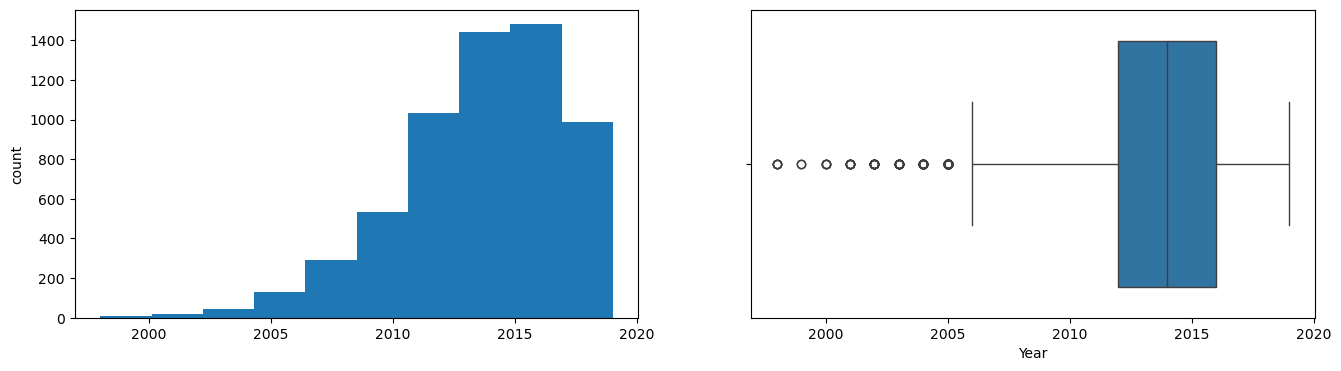

Kilometers_Driven
Skewness: 58.6


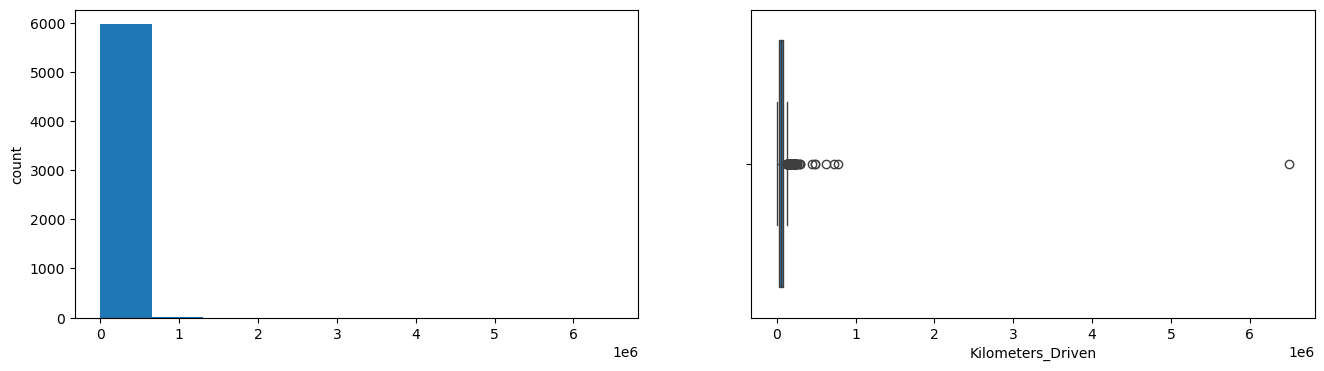

Mileage
Skewness: 0.3


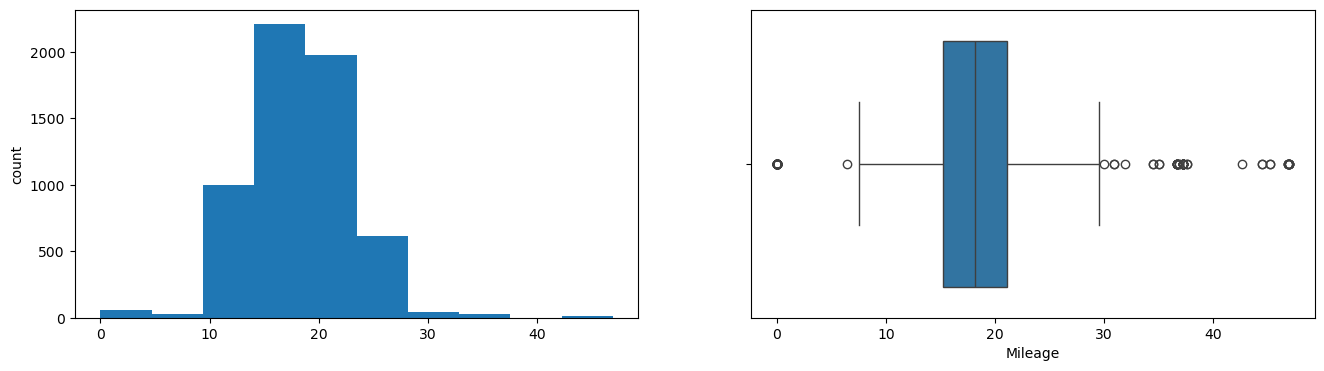

Engine
Skewness: 1.43


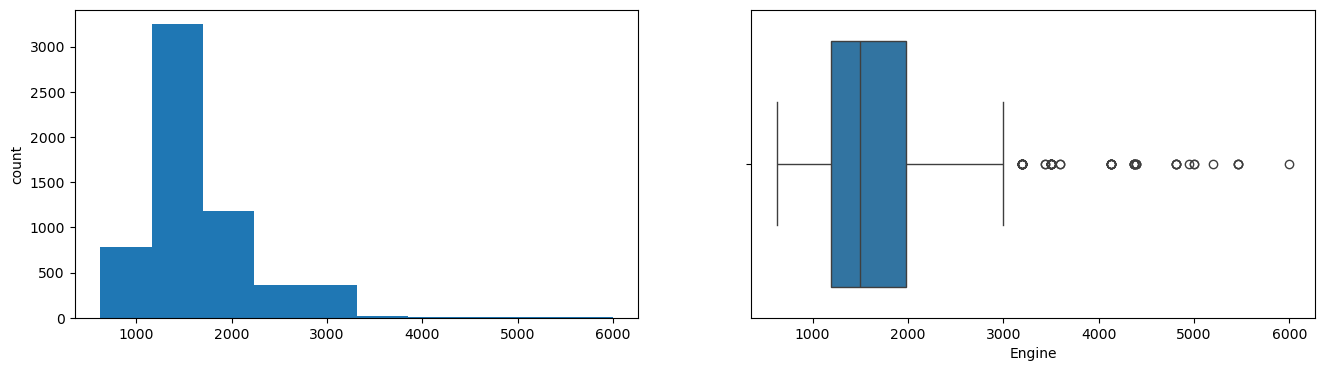

Power
Skewness: 1.92


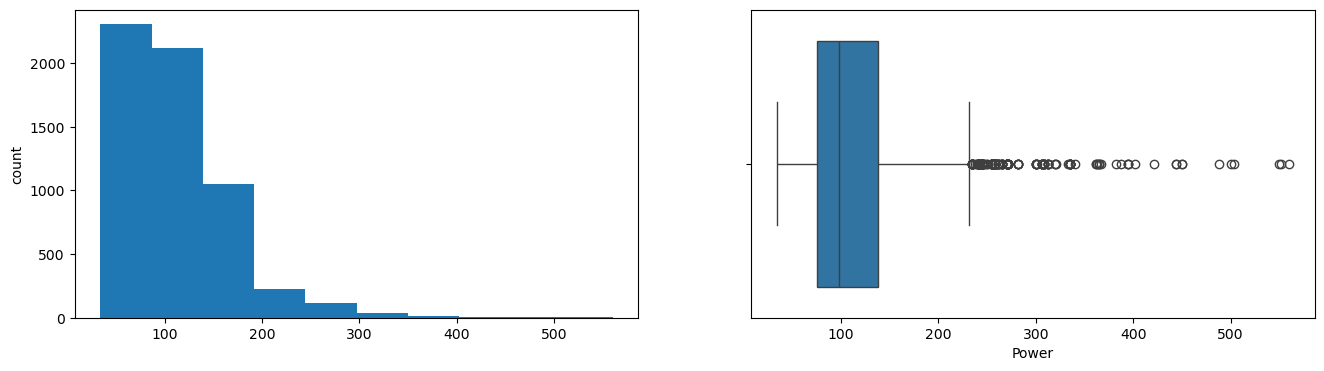

Price
Skewness: 3.33


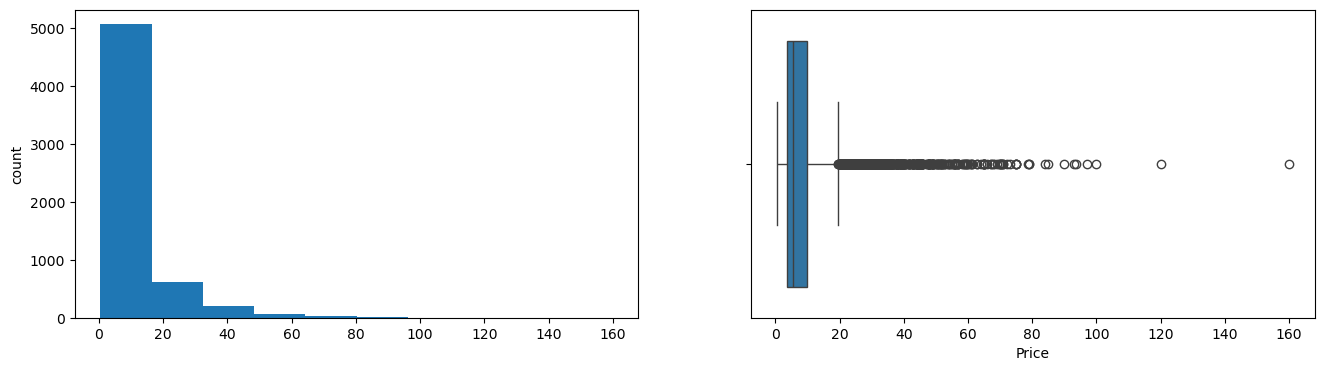

Car_Age
Skewness: 0.84


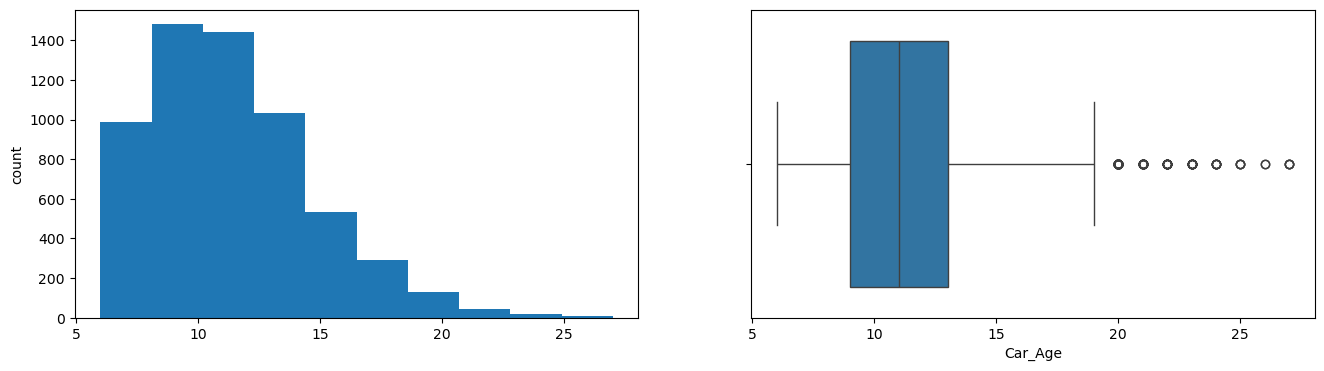

In [49]:
for col in num_col:
    print(col)
    print("Skewness:", round(data[col].skew(),2))
    plt.figure(figsize= (16,4))
    plt.subplot(1,2,1)
    data[col].hist(grid=False)
    plt.ylabel("count")
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

All columns contains outliers we need to remove them


In [51]:
#Outlier Removal
for col in num_col:
    Q1 =data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound= Q1 - 1.5 *IQR
    upper_bound= Q3 + 1.5 *IQR
    data= data[(data[col]>=lower_bound) & (data[col]<=upper_bound)]
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Car_Age
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai,Creta1.6,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda,JazzV,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,ErtigaVDI,13
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.10,5.0,3.50,Nissan,MicraDiesel,12
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.50,8.0,17.50,Toyota,InnovaCrysta,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5.0,4.75,Maruti,SwiftVDI,11
5971,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5.0,4.00,Hyundai,Xcent1.1,10
5972,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8.0,2.90,Mahindra,XyloD4,13
5973,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5.0,2.65,Maruti,WagonR,12


Year
Skewness: -0.42


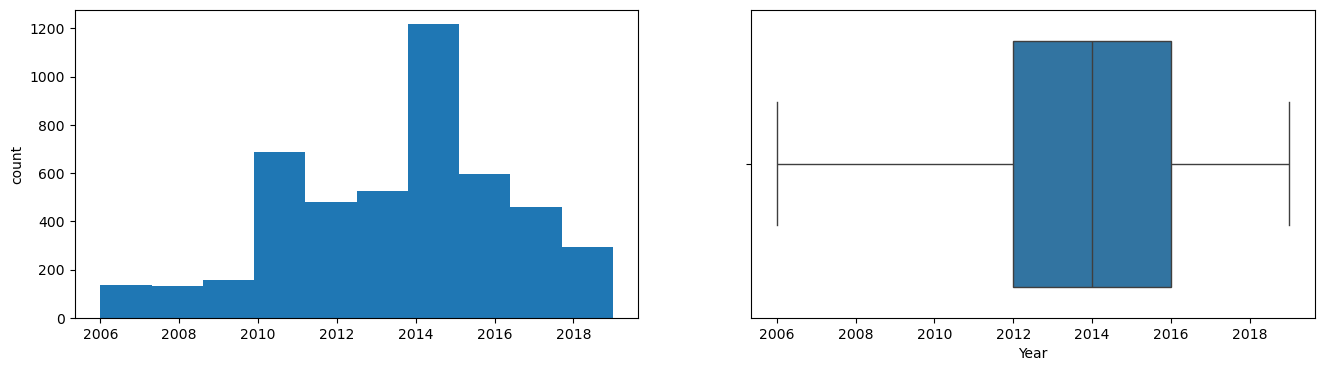

Kilometers_Driven
Skewness: 0.39


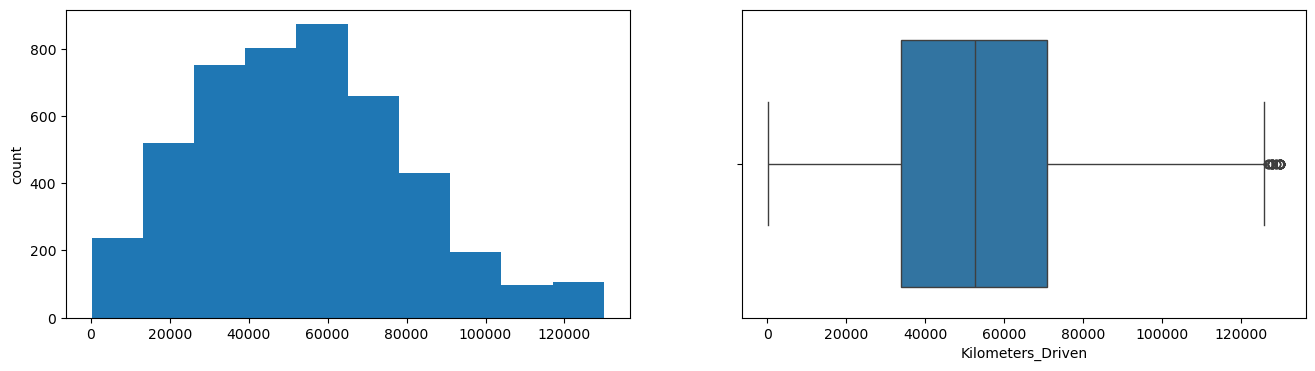

Mileage
Skewness: 0.08


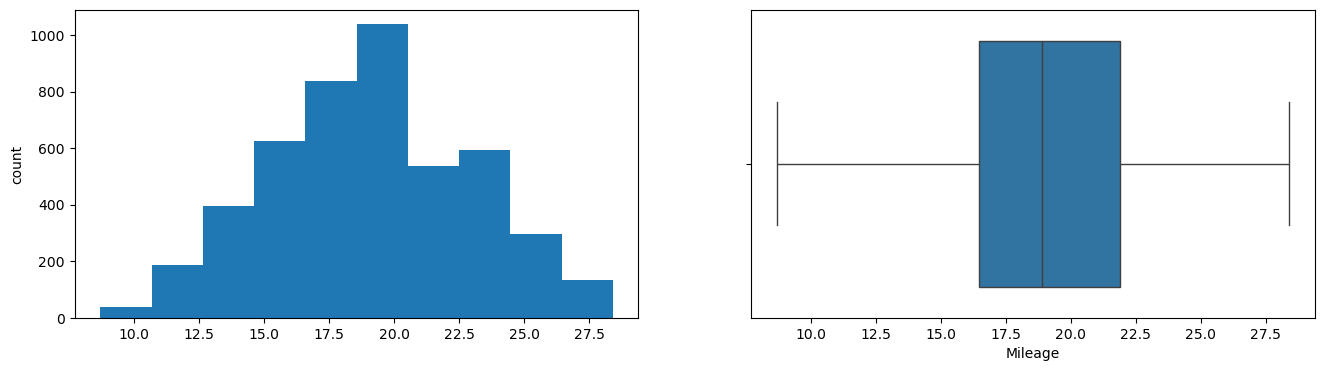

Engine
Skewness: 1.17


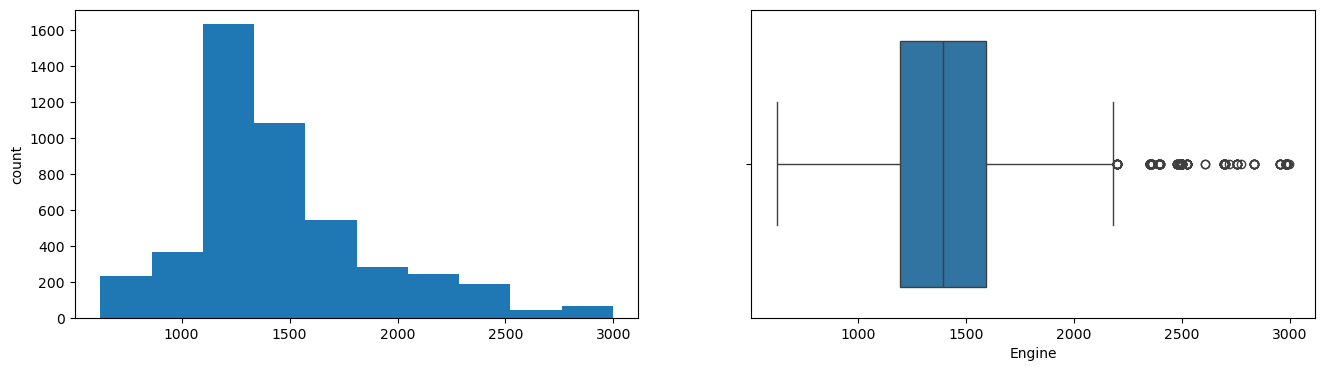

Power
Skewness: 1.09


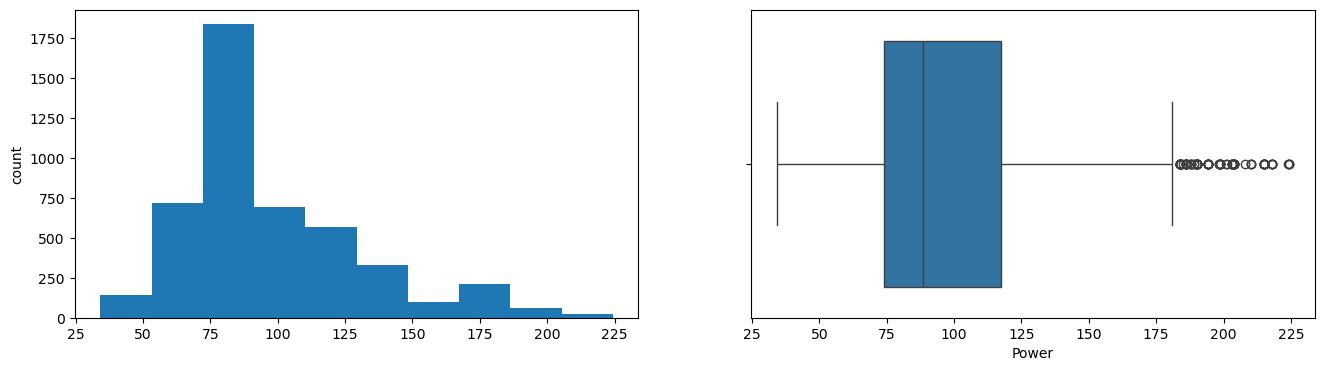

Price
Skewness: 1.23


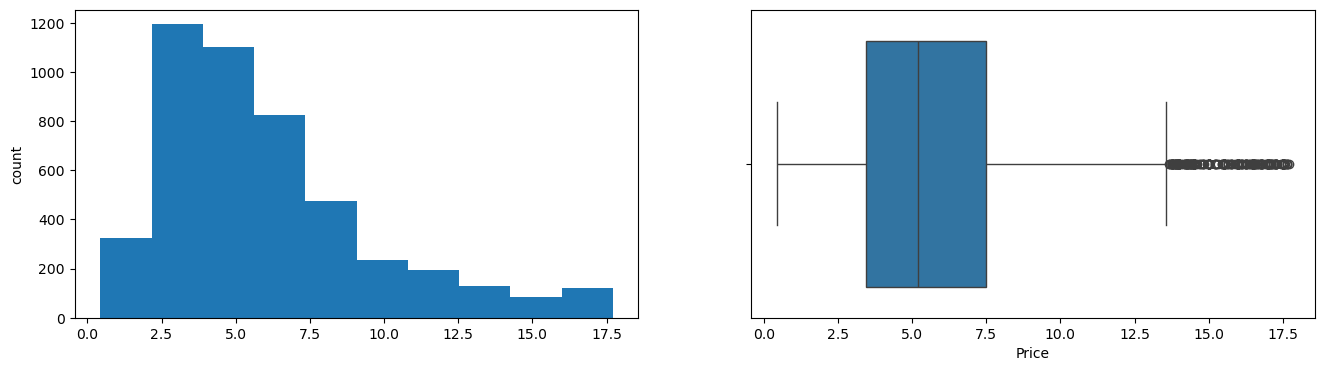

Car_Age
Skewness: 0.42


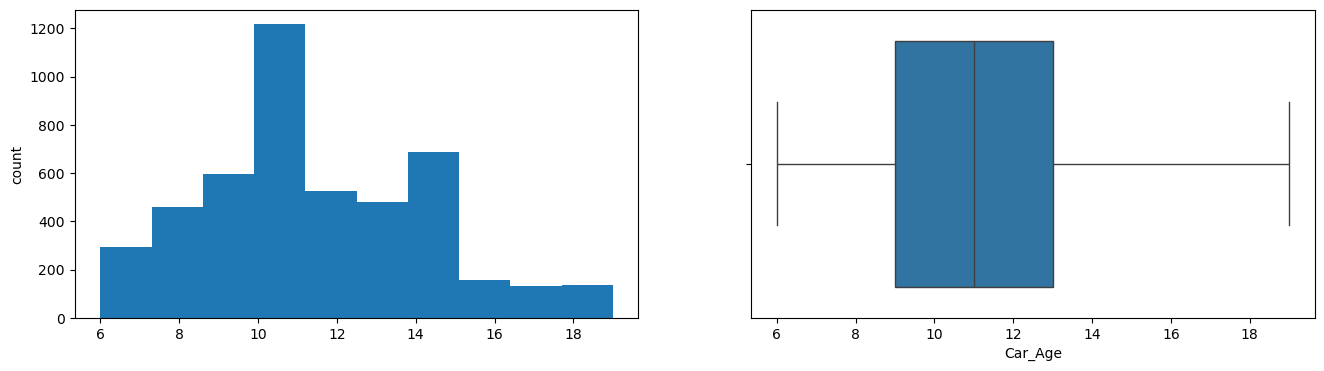

In [52]:
for col in num_col:
    print(col)
    print("Skewness:", round(data[col].skew(),2))
    plt.figure(figsize= (16,4))
    plt.subplot(1,2,1)
    data[col].hist(grid=False)
    plt.ylabel("count")
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

In [53]:
# create countplot for all the categorical columns in nx2 subplots where each subplot represents one column
cat_col

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Seats',
 'Brand',
 'Model']

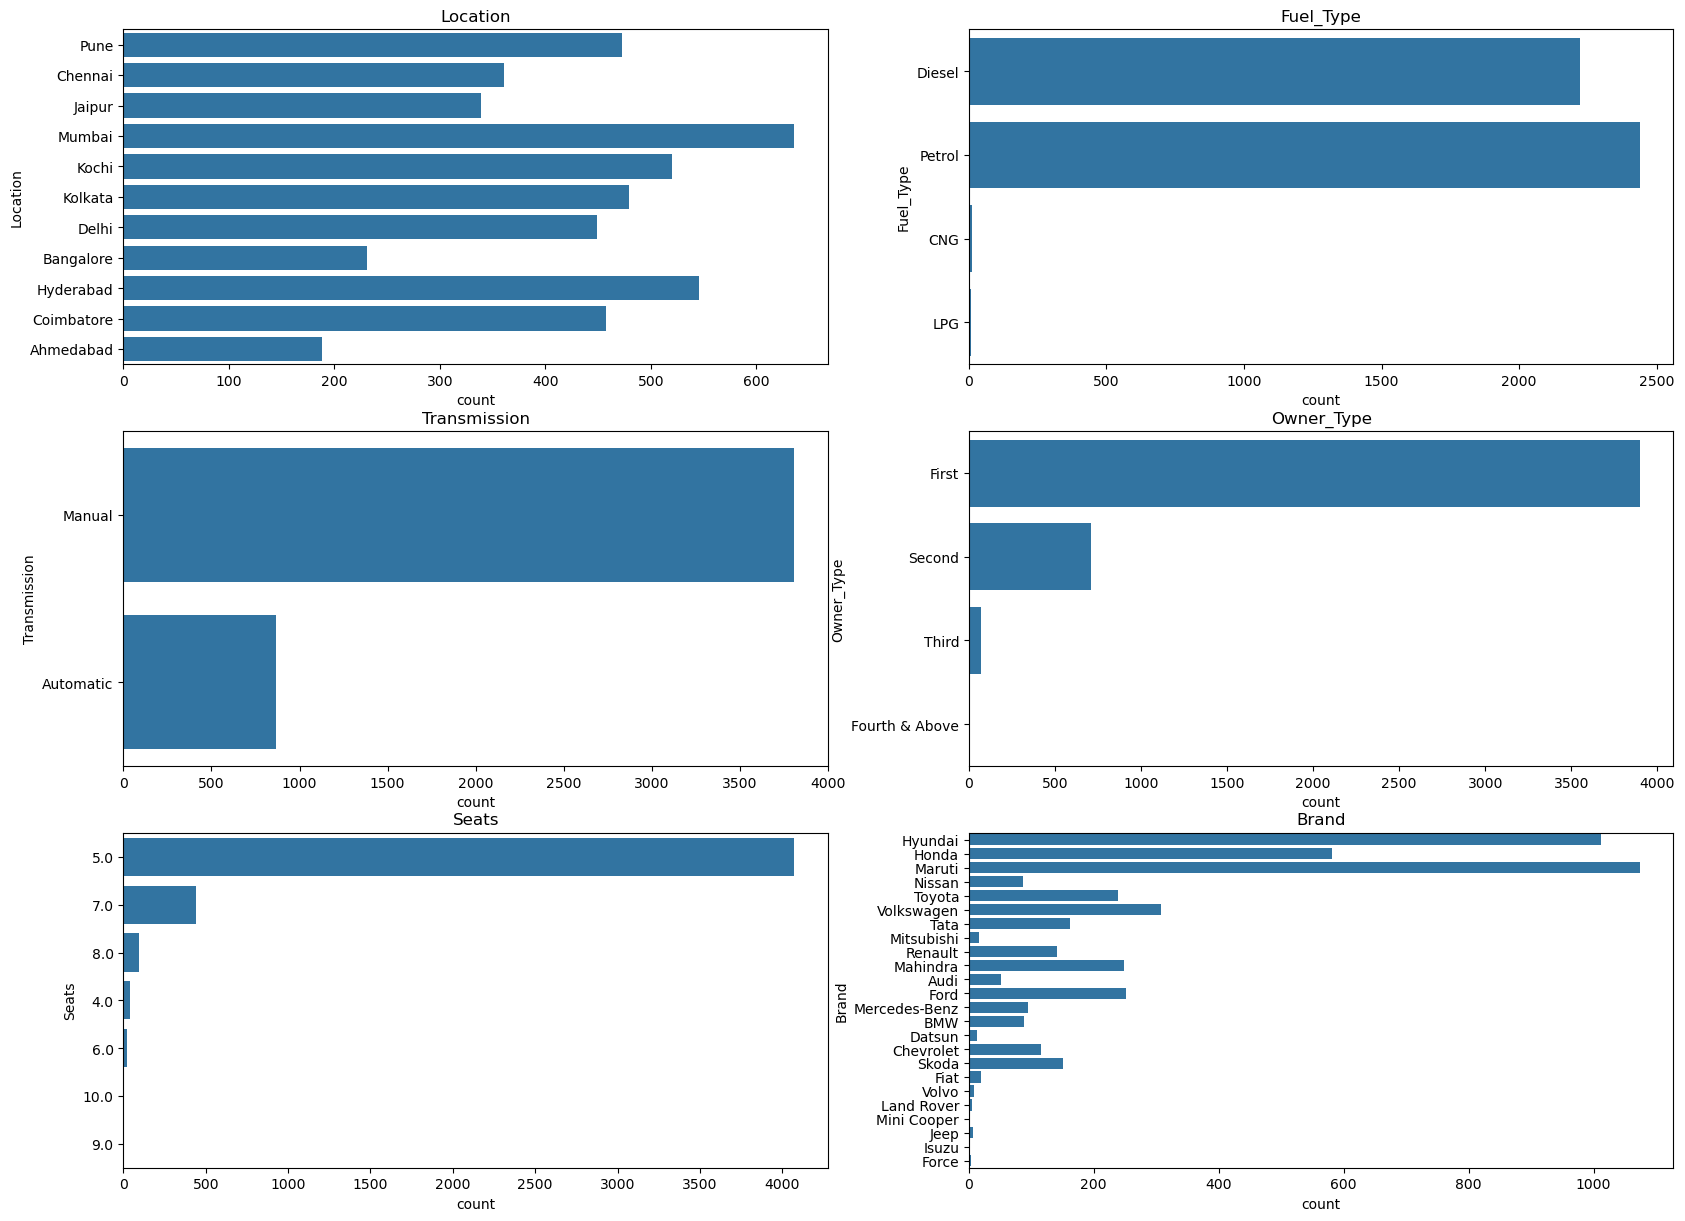

In [54]:
plt.figure(figsize= (20,20))
for i in range(1,7):
    plt.subplot(4,2,i)
    plt.title(cat_col[i])
    sns.countplot(data[cat_col[i]])
plt.show()

From the countplot of categorical columns , we can derive followinf observations:
- Mumbai has the highest number of cars available for purchases, followed by Hyderabad and then Kochi.
- Most of the cars avaialbel for purchases are Diesel as diesel cars provide better performance and diesel cars are cheaper than petrol cars
- ~71% of the available cars have Manual transmission
- ~82% of the cars are first owned followed by second-hand owned cars (~15%)
- Majority cars available for purchase are 5-seater(~84%) followed by 7-seater(~11%)
- Maruti ranks first among all the car brands available in used car market.

## Bivariate EDA

<Figure size 1600x2000 with 0 Axes>

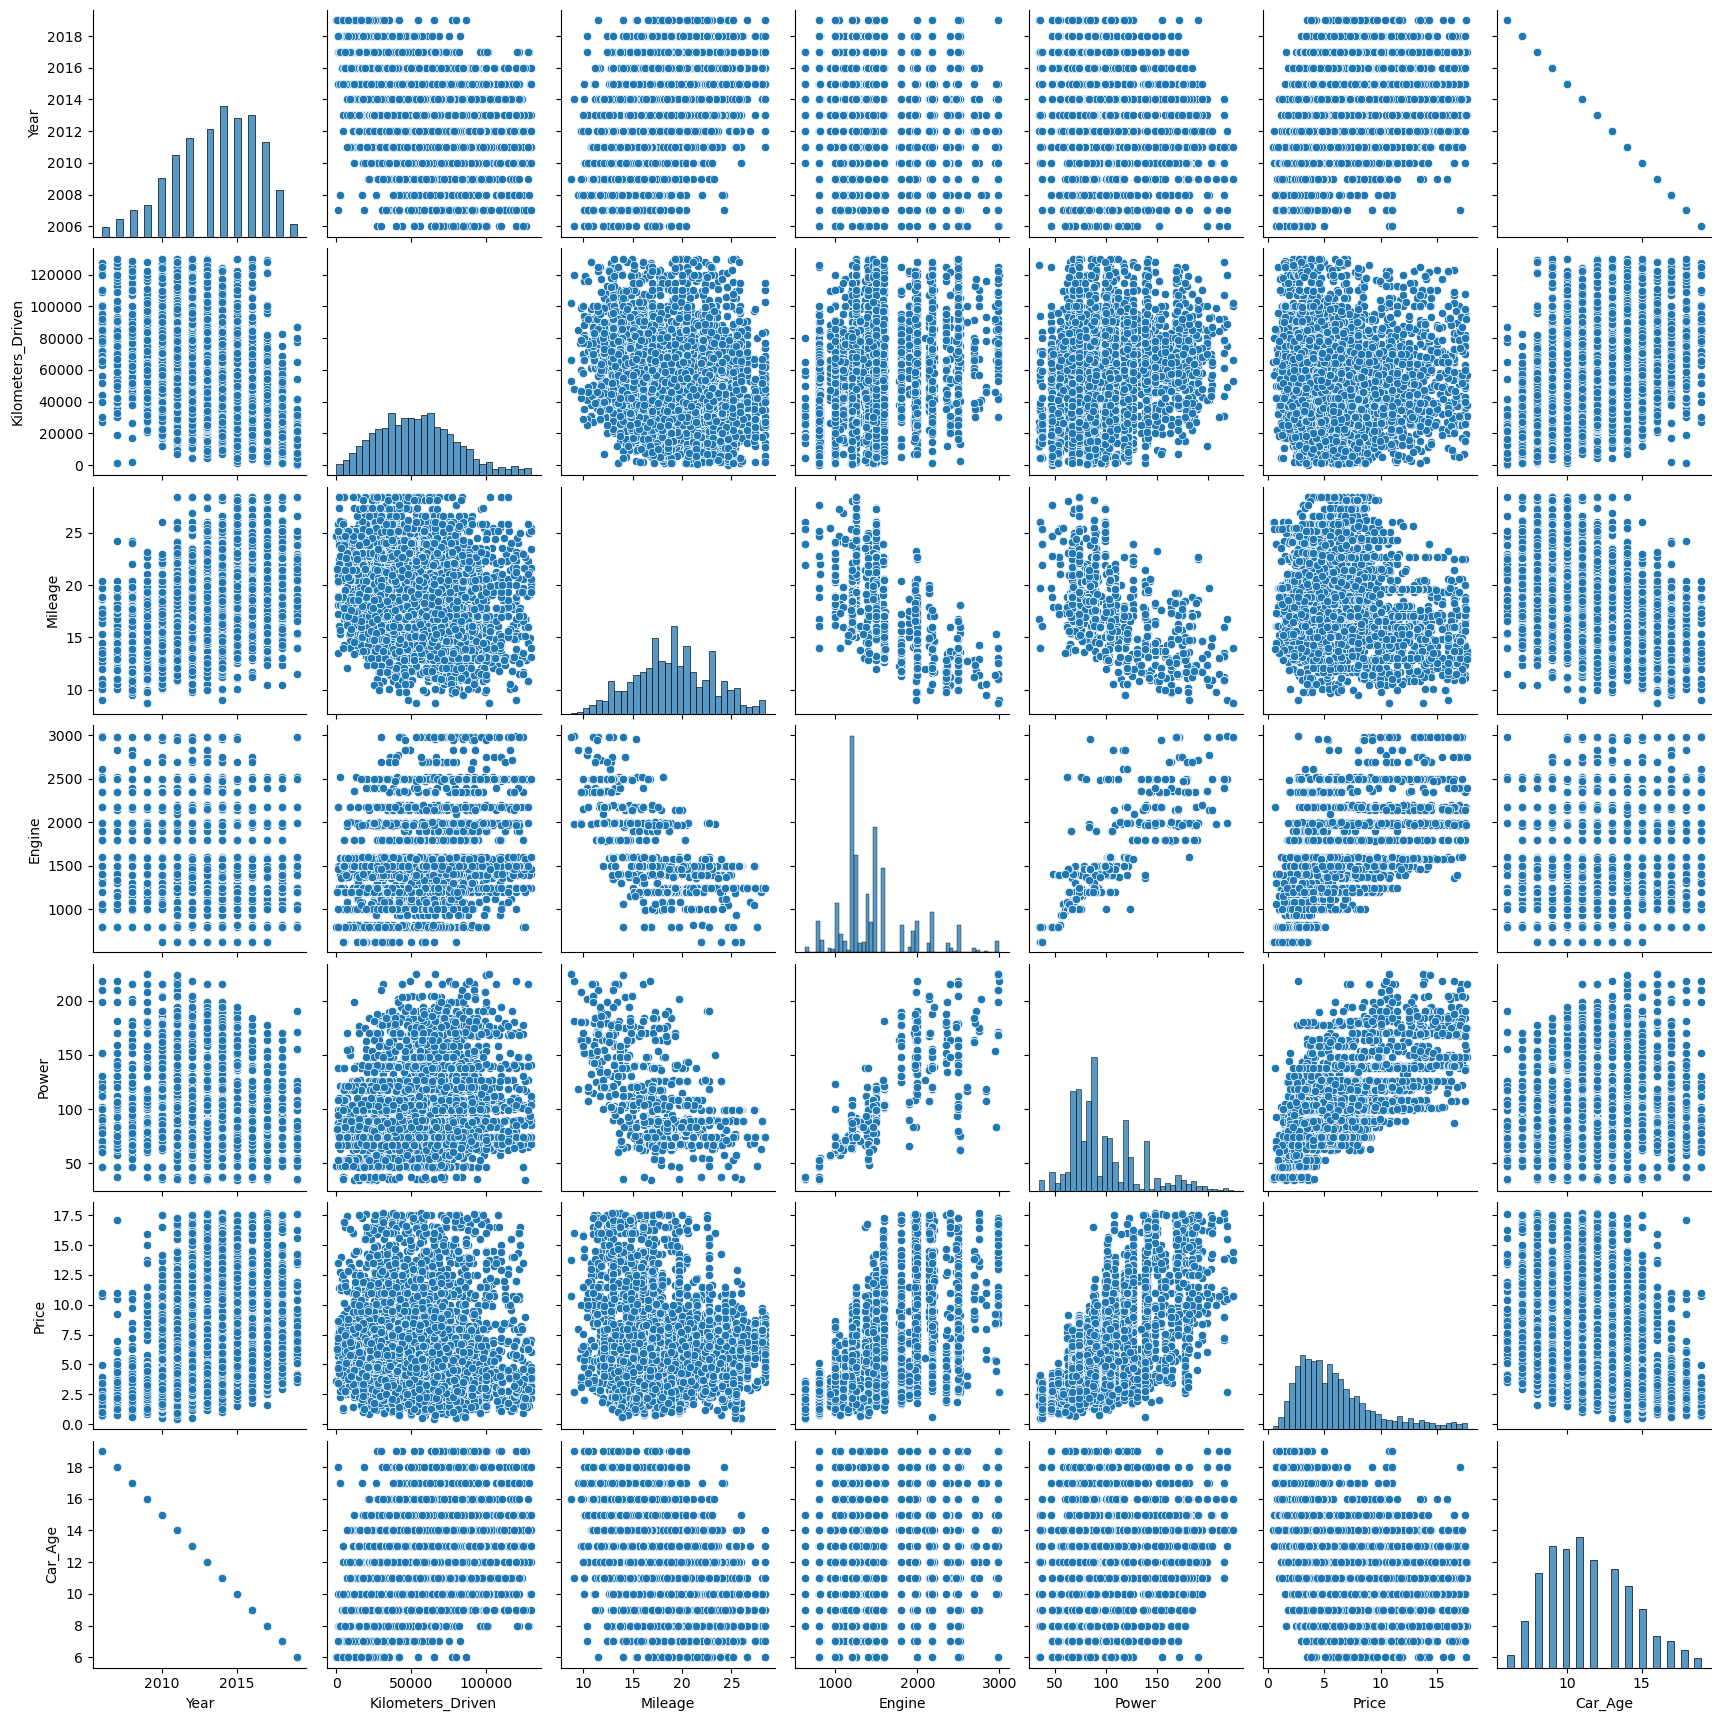

In [57]:
#pairplot
plt.figure(figsize=(16,20))
sns.pairplot(data)
plt.show()

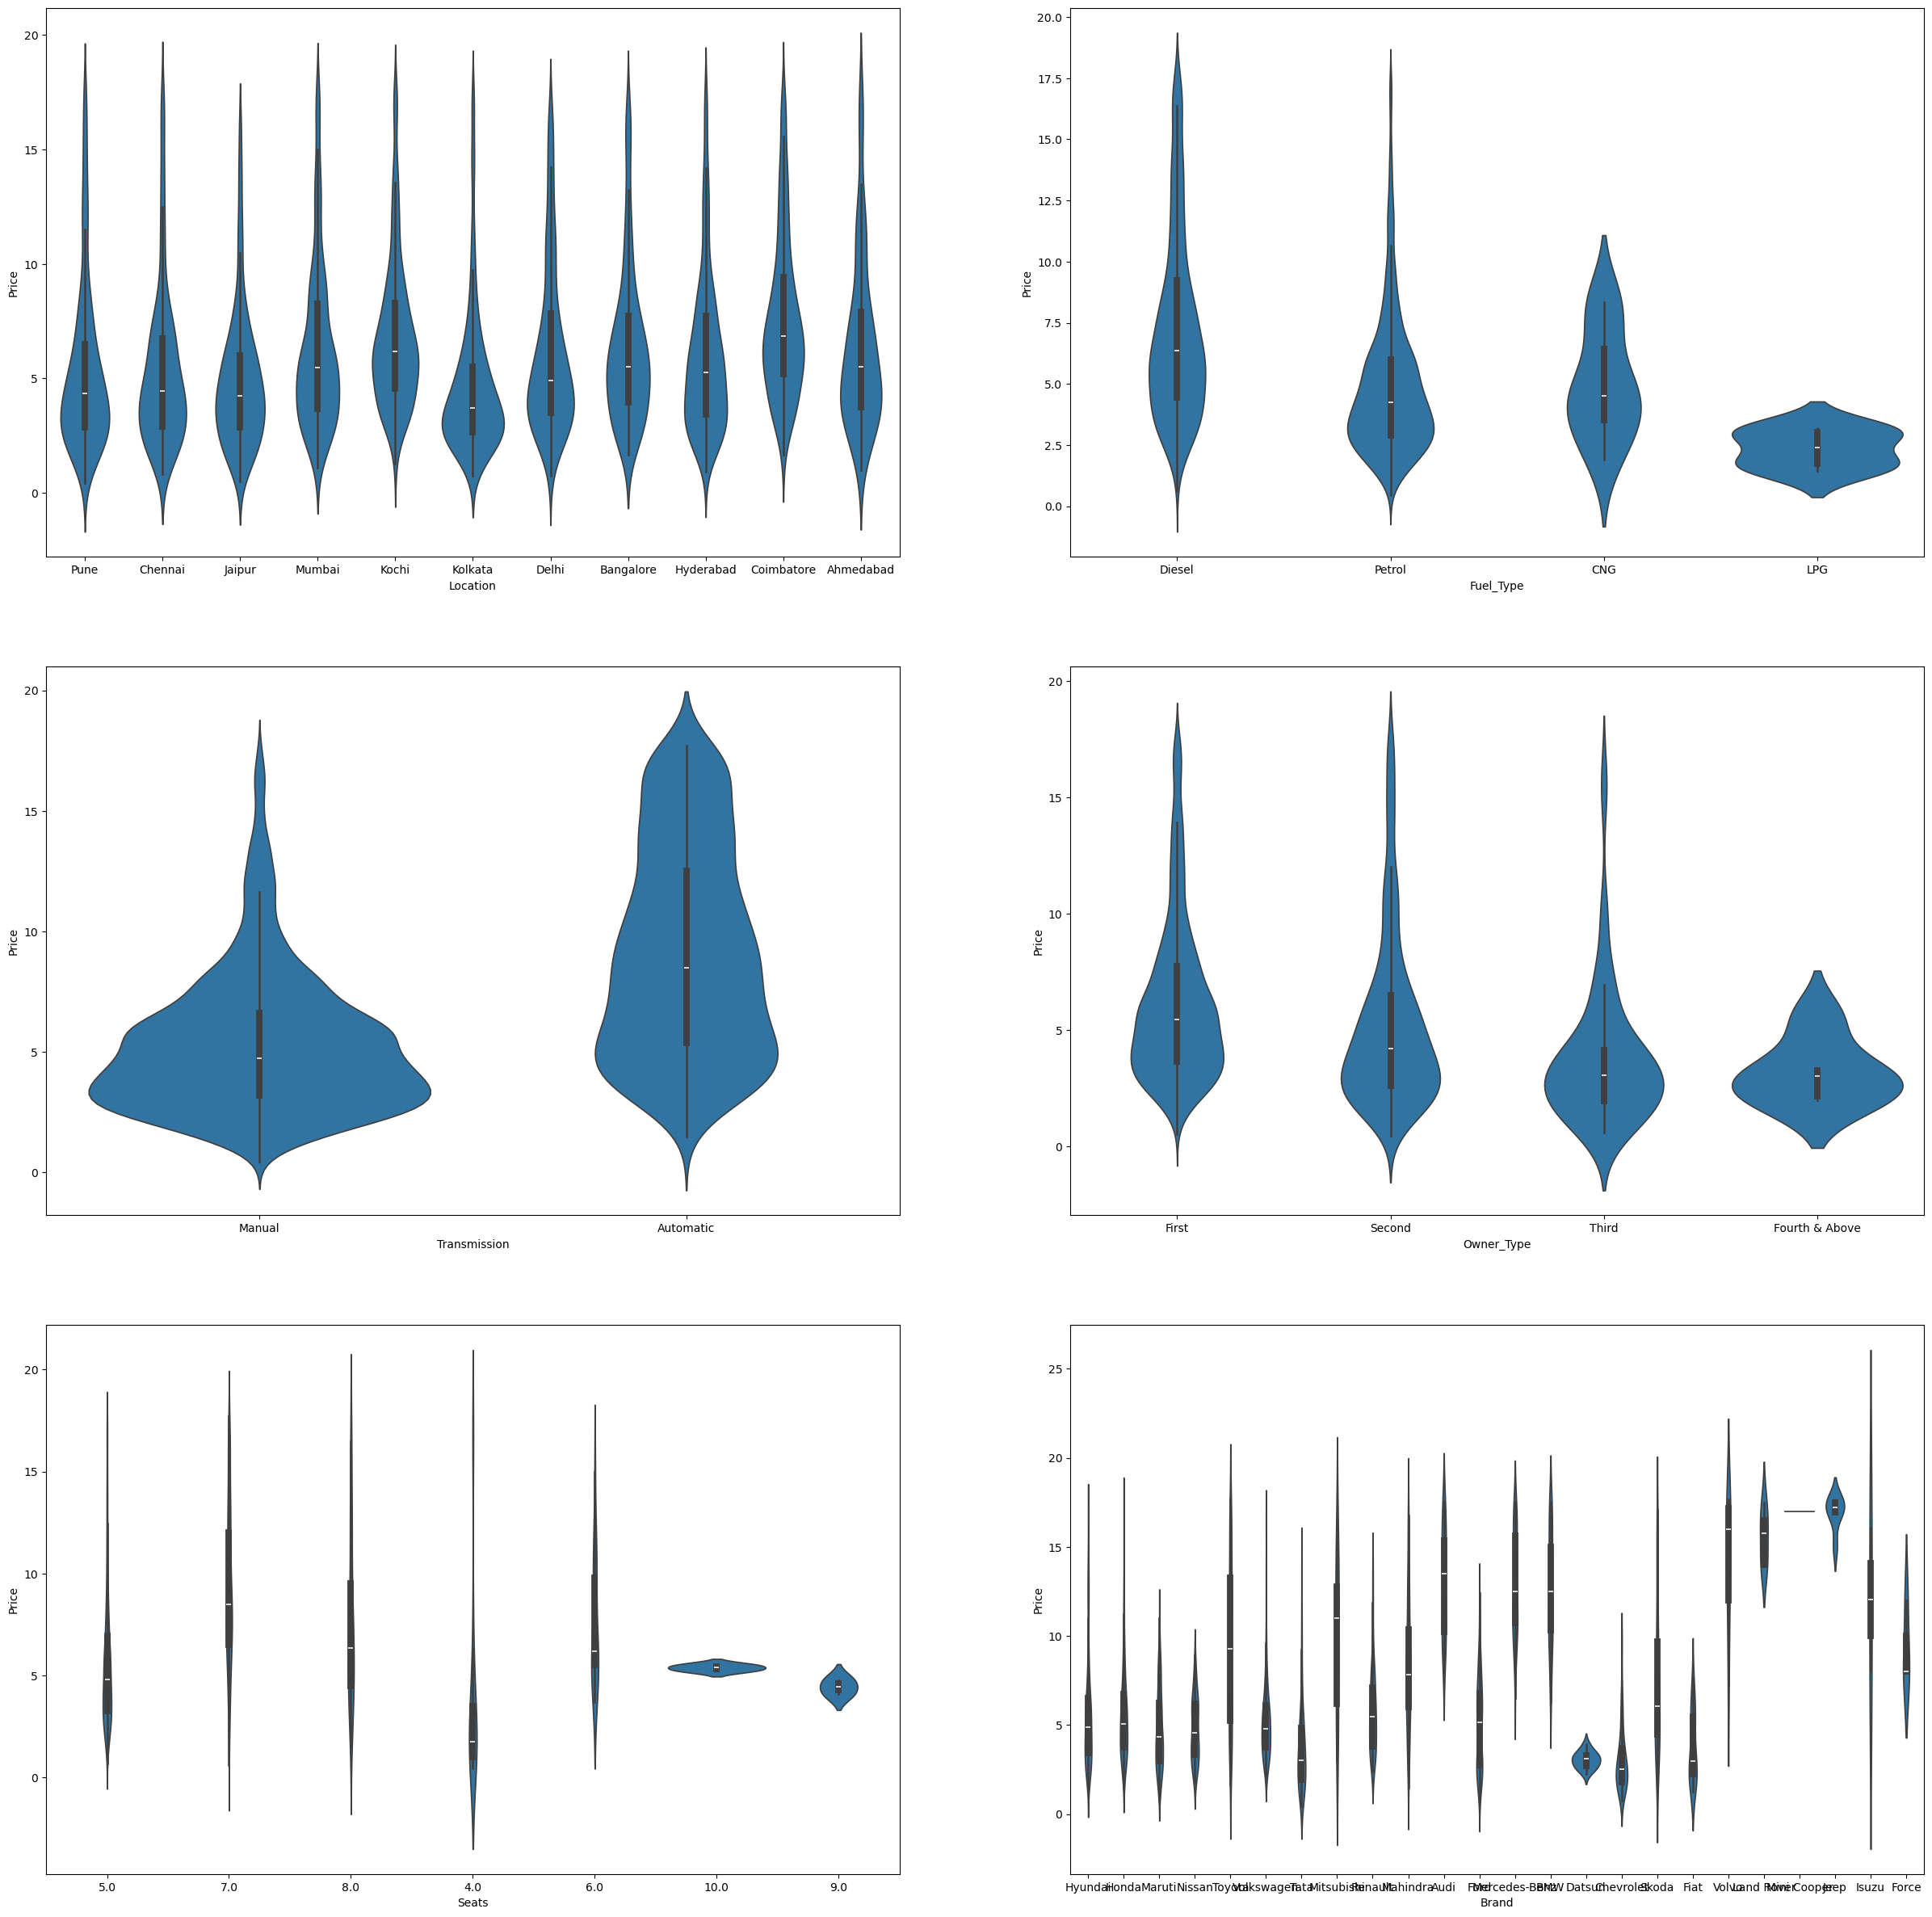

In [58]:
plt.figure(figsize=(30,30))
for i in range(1,7):
    plt.subplot(3,2,i)
    sns.violinplot(data,x=cat_col[i],y='Price')
plt.show()

# Car Price Analysis

## Violin Plot Insights
- **Location:** Price distribution is similar across cities, with slight variations in spread.
- **Fuel Type:** Diesel and petrol cars have higher price ranges; LPG cars are the cheapest.
- **Transmission:** Automatic cars are generally priced higher and have more variation than manual ones.
- **Owner Type:** First-owner cars have the highest prices, while fourth-owner cars are the cheapest.
- **Seats:** Cars with 4-7 seats show the widest price variation, while 2-seater and 9-seater cars have limited distribution.
- **Brand:** Different brands show varied pricing structures, with some having a wide spread between budget and luxury models.




In [60]:
# adding a new column called luxury brand
luxury_brands = [
    "Audi",
    "Mercedes-Benz",
    "BMW",
    "Jaguar",
    "Land Rover",
    "Volvo",
    "Porsche",
    "Bentley",
    "Lamborghini"
]

data['Luxury_brand']=data.Brand.apply(lambda x : 'True' if x in luxury_brands else 'False')

## Multivarite Analysis

In [62]:
data[num_col].corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,Car_Age
Year,1.000000,-0.500627,0.363978,-0.190707,-0.141661,0.371018,-1.000000
Kilometers_Driven,-0.500627,1.000000,-0.163661,0.328940,0.193798,-0.072376,0.500627
Mileage,0.363978,-0.163661,1.000000,-0.605298,-0.537926,-0.247471,-0.363978
Engine,-0.190707,0.328940,-0.605298,1.000000,0.811817,0.602610,0.190707
Power,-0.141661,0.193798,-0.537926,0.811817,1.000000,0.676701,0.141661
Price,0.371018,-0.072376,-0.247471,0.602610,0.676701,1.000000,-0.371018
Car_Age,-1.000000,0.500627,-0.363978,0.190707,0.141661,-0.371018,1.000000


Analysis of the correlation matrix
- **Price Correlations:**
  - Positively correlated with **Engine size (0.60)** and **Power (0.68)**, indicating that higher engine capacity and power lead to higher prices.
  - Weak positive correlation with **Year (0.37)**, suggesting newer cars tend to be priced higher.
  - Weak negative correlation with **Mileage (-0.25)**, meaning higher mileage slightly reduces car prices.
- **Mileage vs. Engine/Power:**
  - Strong negative correlation with **Engine (-0.61)** and **Power (-0.54)**, indicating that larger, more powerful engines tend to have lower mileage.
- **Kilometers Driven:**
  - Positively correlated with **Car Age (0.50)**, meaning older cars tend to have higher kilometers driven.
  - Weak correlation with **Price (-0.07)**, suggesting mileage alone is not a major price determinant.
## Conclusion
- Newer cars, larger engines, and higher power contribute to higher prices.
- Older cars with high mileage tend to be cheaper.
- Price is influenced more by **engine power and size** than by mileage or kilometers driven.

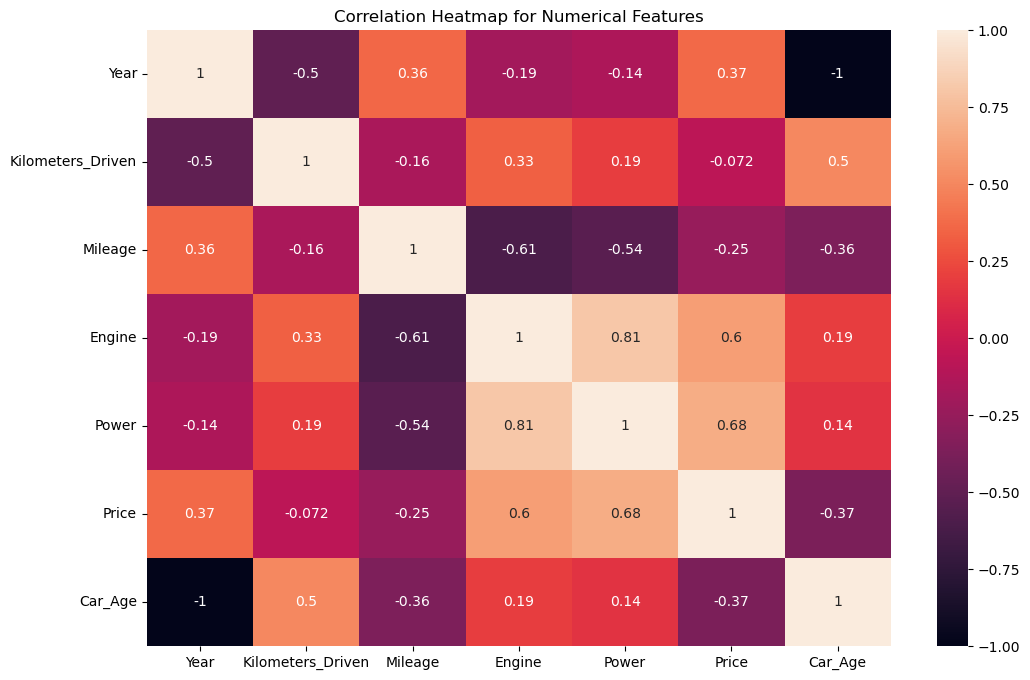

In [64]:
plt.figure(figsize=(12,8)) 
sns.heatmap(data[num_col].corr(), annot =True, fmt='.2g') 
plt.title("Correlation Heatmap for Numerical Features")
plt.show()